In [1]:
import tensorflow as tf
print ("TensorFlow version: " + tf.__version__)
import keras
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import numpy as np
from keras import layers
from keras.models import Model
from keras.models import load_model
from keras.layers.core import Dense, Dropout, Activation, Reshape
from keras import callbacks

TensorFlow version: 2.2.0


In [2]:
xTemp = np.zeros((636, 6, 340, 444))
with open("C:\\Users\\yangz\\Desktop\\FireProjectBatchDownloadNew\\DetectionDatasetFinal\\TrainingB_1060-1696.npy", 'rb') as f1:
        xTemp = np.load(f1)

In [3]:
validation = np.zeros((212, 6, 340, 444))
with open("C:\\Users\\yangz\\Desktop\\FireProjectBatchDownloadNew\\DetectionDatasetFinal\\Validation_1908-2120.npy", 'rb') as f1:
        validation = np.load(f1)

In [4]:
yTemp = np.zeros((636))
for i in range (636):
    if (i%2==0):
        yTemp[i] = 0
    else:
        yTemp[i] = 1

In [5]:
yValidation = np.zeros((212))
for i in range (212):
    if (i%2==0):
        yValidation[i] = 0
    else:
        yValidation[i] = 1

In [6]:
x = np.zeros((848, 6, 340, 444))
y = np.zeros((848))

permutations = np.random.permutation(848)
for i in range (848):
    if (permutations[i] < 636):
        x[i] = xTemp[permutations[i]]
        y[i] = yTemp[permutations[i]]
    else: 
        x[i] = validation[permutations[i]-636]
        y[i] = yValidation[permutations[i]-636]

In [7]:
x = np.reshape(x, (848, 340, 444, 6))
y = y.astype(int)
img_shape = (340, 444, 6)

In [8]:
unitsChoices = [16, 32, 64, 128, 256]
poolSizes = [3, 5]
batchSizes = [4, 8, 16, 32]
nbEpochs = [9, 10, 11, 12]
learnRates = [1e-3, 1e-4, 1e-5]

In [9]:
img = layers.Input(shape=img_shape)

conv1 = layers.Conv2D(unitsChoices[4], (poolSizes[1], poolSizes[1]), padding='same', activation='relu', strides=5)(img)
bn1 = layers.BatchNormalization()(conv1)
maxPooling1 = layers.MaxPooling2D(padding='same')(bn1)

conv2 = layers.Conv2D(unitsChoices[2], (poolSizes[1], poolSizes[1]), padding='same', activation='elu', strides=5)(maxPooling1)
bn2 = layers.BatchNormalization()(conv2)
maxPooling2 = layers.MaxPooling2D(padding='same')(bn2)

conv3 = layers.Conv2D(unitsChoices[2], (poolSizes[1], poolSizes[1]), padding='same', activation='elu', strides=3)(maxPooling2)
bn3 = layers.BatchNormalization()(conv3)
maxPooling3 = layers.MaxPooling2D(padding='same')(bn3)

conv4 = layers.Conv2D(unitsChoices[4], (poolSizes[0], poolSizes[0]), padding='same', activation='elu', strides=3)(maxPooling3)
bn4 = layers.BatchNormalization()(conv4)
maxPooling4 = layers.MaxPooling2D(padding='same')(bn4)

conv5 = layers.Conv2D(unitsChoices[1], (poolSizes[0], poolSizes[0]), padding='same', activation='elu', strides=3)(maxPooling4)
maxPooling5 = layers.MaxPooling2D(padding='same')(conv5)

flatten = layers.Flatten()(maxPooling5)

dense1 = layers.Dense(unitsChoices[4], activation = "relu")(flatten)
drop2 = layers.Dropout(0.5420313649456072)(dense1)
res = layers.Dense(1, activation='sigmoid')(drop2)

model = Model(img, res)
opt = tf.keras.optimizers.RMSprop(learning_rate=learnRates[2])
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [10]:
model.load_weights("Model2TrainingA-HO-V2.hdf5")

In [11]:
history = model.fit(x, y, batch_size = batchSizes[0], epochs = nbEpochs[3])

Epoch 1/12
212/212 [==============================] - 44s 205ms/step - loss: 0.5487 - accuracy: 0.7075
Epoch 2/12
212/212 [==============================] - 40s 188ms/step - loss: 0.5370 - accuracy: 0.7193s - loss: 0
Epoch 3/12
212/212 [==============================] - 38s 179ms/step - loss: 0.4896 - accuracy: 0.7370
Epoch 4/12
212/212 [==============================] - 38s 179ms/step - loss: 0.4761 - accuracy: 0.7594
Epoch 5/12
212/212 [==============================] - 39s 183ms/step - loss: 0.4241 - accuracy: 0.8078
Epoch 6/12
212/212 [==============================] - 38s 180ms/step - loss: 0.4162 - accuracy: 0.8042s - loss: 0.4139 - 
Epoch 7/12
212/212 [==============================] - 38s 182ms/step - loss: 0.3898 - accuracy: 0.8278
Epoch 8/12
212/212 [==============================] - 38s 181ms/step - loss: 0.3670 - accuracy: 0.8467
Epoch 9/12
212/212 [==============================] - 38s 181ms/step - loss: 0.3343 - accuracy: 0.8597
Epoch 10/12
212/212 [======================

In [12]:
model.save_weights("Model2TrainingB-HO-V2.hdf5")

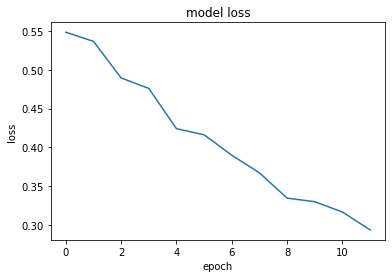

In [13]:
from matplotlib import pyplot as plt
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.plot(history.history['loss'])

In [14]:
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 340, 444, 6)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 68, 89, 256)       38656     
_________________________________________________________________
batch_normalization (BatchNo (None, 68, 89, 256)       1024      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 34, 45, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 9, 64)          409664    
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 9, 64)          256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 5, 64)          0     